## **Market Basket Analysis for Marketing**


## Project Goal


This project is dedicated to performing the market basket analysis based on the dataset which belongs to "The Bread Basket", a bakery located in Edinburgh. The dataset has 20507 entries, over 9000 transactions, and 4 columns.


## Introduction


All modern companies, including online stores, analyze customer transactions and use them to form a market basket, which is actually a set of popular products that are bought together.
This basket can be used for planning marketing campaigns, in particular to create recommendations for shopping, product range, placement on supermarket shelves or making promotional offers.

Market Basket Analysis is a powerful marketing tool for turning a huge number of customer transactions into simple, easy-to-visualize rules used to promote a product and build sales recommendations.

Project Objectives: to perform the analysis of the market basket using both classical methods of data visualization and the Apriori algorithm, standard indicators, rules of association, aggregation and pruning, to visualize associative rules in the form of a dynamic graph.


## Materials and methods


The statistical data was obtained from the https://www.kaggle.com/mittalvasu95/the-bread-basket. This DataSet released under CC0: Public Domain license that allow of encouraging free re-use of its data, both for non-commercial and commercial purposes. 


## Libraries
* [Python](https://www.python.org) 
* [Pandas](https://pandas.pydata.org) 
* [SeaBorn](https://seaborn.pydata.org) 
* [mlxtend](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/) 
* [pyvis](https://pyvis.readthedocs.io/en/latest/)


## Project Steps


* Download a DataSet from *.csv files
* Create new and recalculate values of existing columns
* Transform a DataSet of transactions into a market basket DataSet
* Visualize data with seaborn
* Produce Association rules
* Analyze market basket
* Visualize graph of association rules


## Download and pre-preparation of data


In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from pyvis.network import Network
import datetime as dt
import numpy as np

In [200]:
df = pd.read_csv("bread_basket.csv")
df

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend


The DataSet consists of 20507 rows and 5 columns. 


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


The first column of the DataSet has int64 type. All other are of object type. 
The DataSet has the following columns:

1. Transaction: the transaction id which is unique for each order
2. Item: a list of items to be ordered/placed by customer
3. date_time: the date and time of the transaction. 
4. period_day: the period of the day when a customer ordered/placed
5. weekday_weekend: is the day is weekend (sat or sun) or a weekday.

First of all we need to change the data type of the date_time column.


In [202]:
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction      20507 non-null  int64         
 1   Item             20507 non-null  object        
 2   date_time        20507 non-null  datetime64[ns]
 3   period_day       20507 non-null  object        
 4   weekday_weekend  20507 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 801.2+ KB


Add some new columns for basic visual market basket analysis.

To analyse purchases dynamics during different time period, we should split date_time columns into time and hours.


In [203]:
df['time']=df['date_time'].dt.time
df['hour']=df['date_time'].dt.hour

To analyse the dynamics of purchases during the year, we should add columns with month numbers and their names.


In [204]:
df['month'] = df['date_time'].dt.month
df['month name'] = df['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','May','June','July','August','September','October','November','December'])

Similarly, to analyse weekly purchases, we need to highlight the days of the week and their names.


In [205]:
df['day'] = df['date_time'].dt.day
df['weekday'] = df['date_time'].dt.weekday
df['weekday name'] = df['weekday'].replace([0,1,2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

The final DataSet:


In [206]:
df

,Transaction,Item,date_time,period_day,weekday_weekend,time,hour,month,month name,day,weekday,weekday name
0,1,Bread,2016-10-30 09:58:00,morning,weekend,09:58:00,9,10,October,30,6,Sunday
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10:05:00,10,10,October,30,6,Sunday
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10:05:00,10,10,October,30,6,Sunday
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10:07:00,10,10,October,30,6,Sunday
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10:07:00,10,10,October,30,6,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-04-09 14:32:00,afternoon,weekend,14:32:00,14,4,April,9,6,Sunday
20503,9682,Tea,2017-04-09 14:32:00,afternoon,weekend,14:32:00,14,4,April,9,6,Sunday
20504,9683,Coffee,2017-04-09 14:57:00,afternoon,weekend,14:57:00,14,4,April,9,6,Sunday
20505,9683,Pastry,2017-04-09 14:57:00,afternoon,weekend,14:57:00,14,4,April,9,6,Sunday


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction      20507 non-null  int64         
 1   Item             20507 non-null  object        
 2   date_time        20507 non-null  datetime64[ns]
 3   period_day       20507 non-null  object        
 4   weekday_weekend  20507 non-null  object        
 5   time             20507 non-null  object        
 6   hour             20507 non-null  int32         
 7   month            20507 non-null  int32         
 8   month name       20507 non-null  object        
 9   day              20507 non-null  int32         
 10  weekday          20507 non-null  int32         
 11  weekday name     20507 non-null  object        
dtypes: datetime64[ns](1), int32(4), int64(1), object(6)
memory usage: 1.6+ MB


We have 11 columns with all necessary information for preliminary visual market basket analysis.


## Data Visualizations


Let's analyze top 20 most popular purchases. 


In [208]:
popular = df['Item'].value_counts()
(df['Item'].value_counts(normalize=True)*100).head(20)

Item
Coffee           26.678695
Bread            16.213976
Tea               6.997611
Cake              4.998293
Pastry            4.174184
Sandwich          3.759692
Medialuna         3.003852
Hot chocolate     2.877066
Cookies           2.633247
Brownie           1.848149
Farm House        1.823767
Muffin            1.804262
Alfajores         1.799386
Juice             1.799386
Soup              1.667723
Scone             1.594577
Toast             1.550690
Scandinavian      1.350758
Truffles          0.941142
Coke              0.902131
Name: proportion, dtype: float64

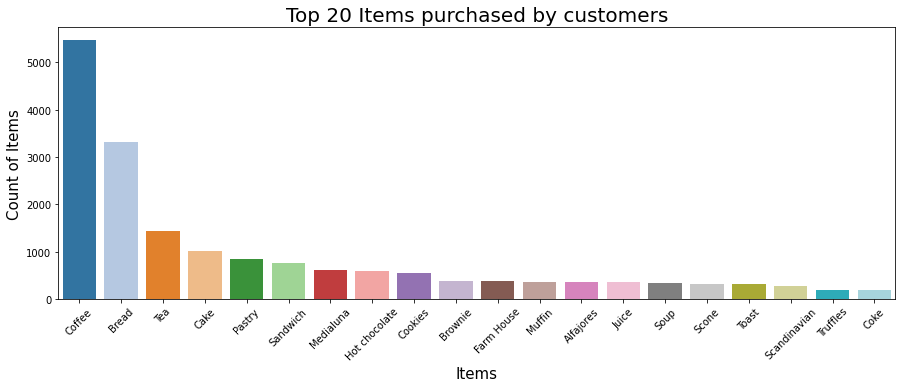

In [209]:
plt.figure(figsize=(15,5))
sns.barplot(x=popular.head(20).index, y=popular.head(20).values, hue=popular.head(20).index, palette='tab20', dodge=False, legend=False)
plt.xlabel('Items', size=15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size=15)
plt.title('Top 20 Items purchased by customers', size=20)
plt.show()

The most popular (26%) of purchases is Coffee, the next is (16%) Bread, then goes Tea (6.99%).


Let's analyze the dynamics of monthly purchases. For correct sorting, we need to group the DataSet by month number but display on the graph by month name.


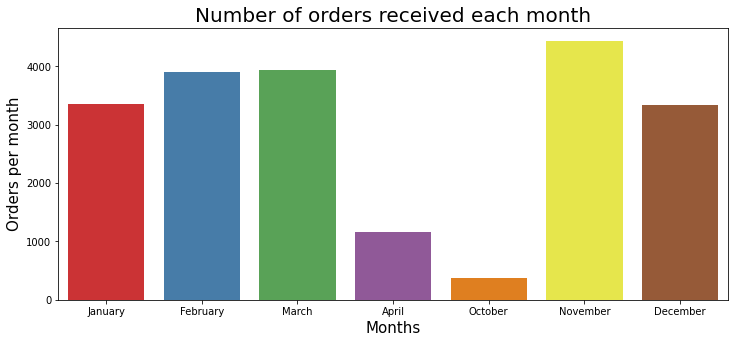

In [210]:
monthTran = df.groupby(['month','month name'])['Transaction'].count().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data=monthTran[['month name', 'Transaction']], x="month name", y="Transaction", hue="month name", palette='Set1', dodge=False, legend=False)
plt.xlabel('Months', size=15)
plt.ylabel('Orders per month', size=15)
plt.title('Number of orders received each month', size=20)
plt.show()

The largest number of purchases corresponds to March and November. Also, the most active buyers are in winter. In summer and early autumn, activity is the lowest.


Let's analyze monthly purchases for the six most popular products.


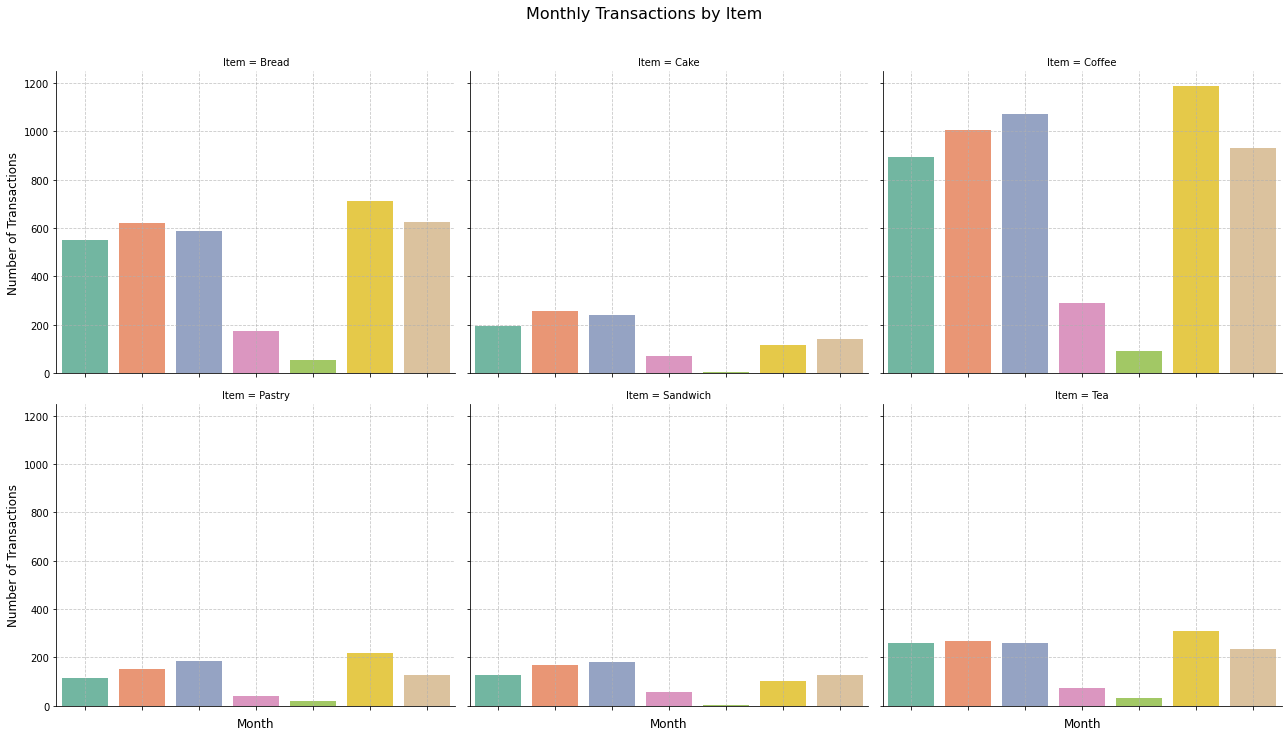

In [211]:
# Create the transaction summary
monthTranTransaction = df[df.Item.isin(popular.head(6).index)].groupby(['month','month name','Item'])['Transaction'].count().reset_index()

# Create improved catplot
ax = sns.catplot(
    data=monthTranTransaction,
    x="month name",
    y="Transaction",
    col="Item",
    hue="month name",  # Add hue parameter
    legend=False,      # Remove legend since it's redundant
    kind="bar",
    height=5,
    aspect=1.2,
    col_wrap=3,
    palette='Set2'
)

# Customize plot appearance
ax.fig.suptitle('Monthly Transactions by Item', y=1.02, fontsize=16)
ax.set_xlabels('Month', fontsize=12)
ax.set_ylabels('Number of Transactions', fontsize=12)
ax.set_xticklabels(rotation=45, ha='right')

# Adjust layout and add grid
plt.tight_layout()
for axes in ax.axes.flat:
    axes.grid(True, linestyle='--', alpha=0.7)
    axes.tick_params(labelsize=10)

plt.show()

Let's analyze the weekly activity. 


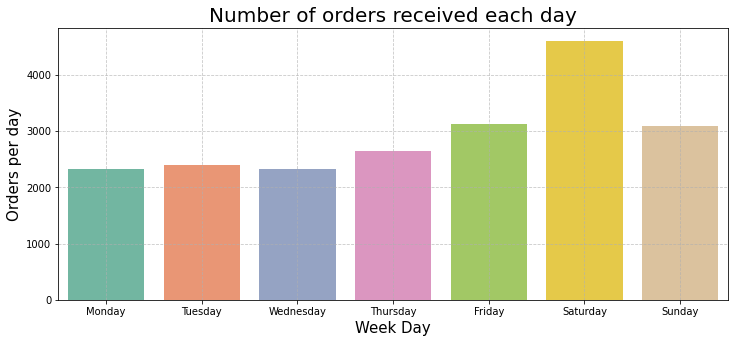

In [212]:
# Step 1: Create weekday transaction summary
weekTran = df.groupby(['weekday','weekday name'])['Transaction'].count().reset_index()

# Step 2: Create enhanced visualization
plt.figure(figsize=(12,5))
sns.barplot(
    data=weekTran[['weekday name', 'Transaction']], 
    x="weekday name", 
    y="Transaction",
    hue="weekday name",
    palette="Set2",
    dodge=False,
    legend=False
)

# Step 3: Customize appearance
plt.xlabel('Week Day', size=15)
plt.ylabel('Orders per day', size=15)
plt.title('Number of orders received each day', size=20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

As you can see from the plot, buyers are active throughout the week. There are no days with no purchases. You can see that the maximum number of purchases falls upon Saturday.

Let's analyze similarly for the six most popular products


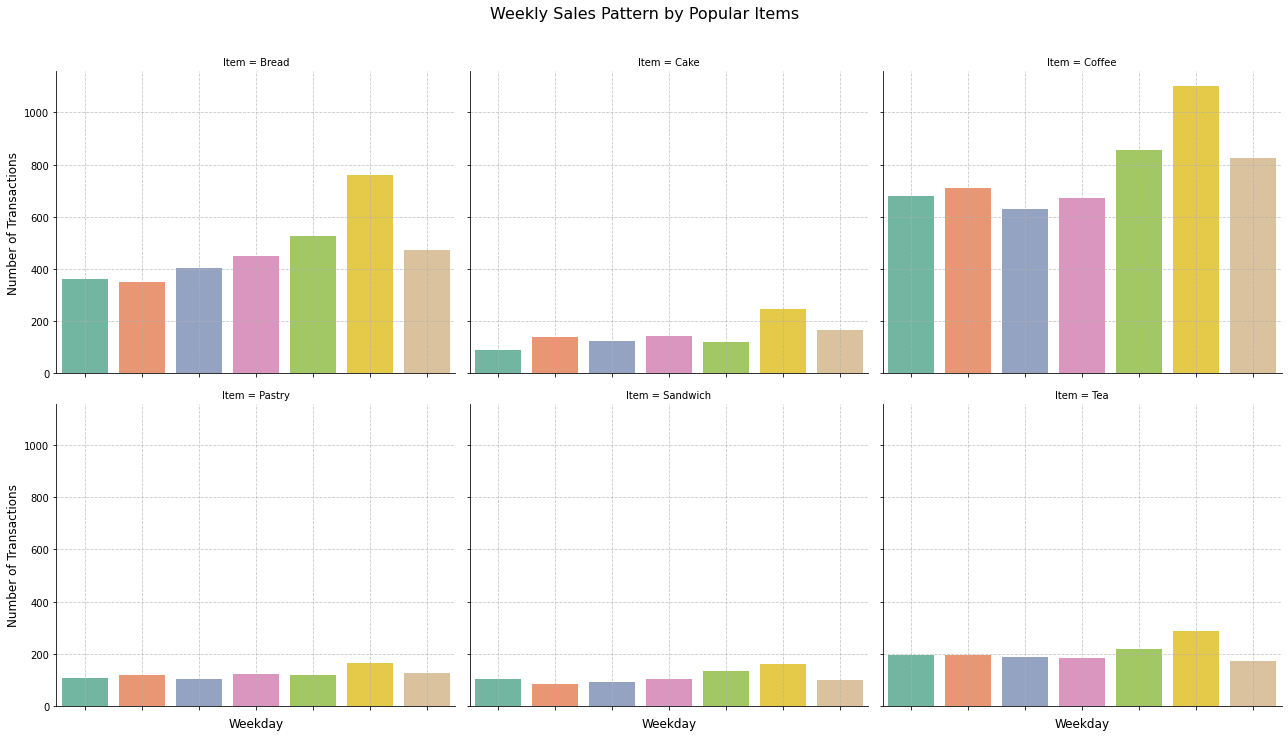

In [213]:
# Create weekly transaction summary for top 6 items
weekTran = df[df.Item.isin(popular.head(6).index)].groupby(['weekday','weekday name', 'Item'])['Transaction'].count().reset_index()

# Create enhanced subplot visualization
ax = sns.catplot(
    data=weekTran,
    x="weekday name",
    y="Transaction",
    col="Item",
    hue="weekday name",
    legend=False,
    kind="bar",
    height=5,
    aspect=1.2,
    col_wrap=3,
    palette='Set2'
)

# Customize appearance
ax.fig.suptitle('Weekly Sales Pattern by Popular Items', y=1.02, fontsize=16)
ax.set_xlabels('Weekday', fontsize=12)
ax.set_ylabels('Number of Transactions', fontsize=12)
ax.set_xticklabels(rotation=45, ha='right')

# Add grid and adjust layout
plt.tight_layout()
for axes in ax.axes.flat:
    axes.grid(True, linestyle='--', alpha=0.7)
    axes.tick_params(labelsize=10)

plt.show()

Let's analyze the share of purchases on weekends and weekdays.


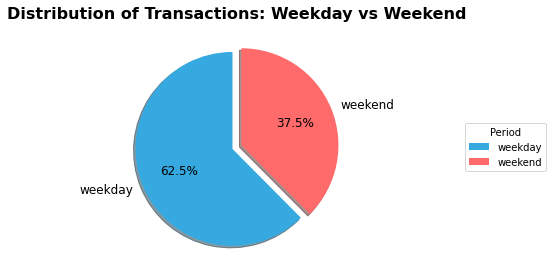

In [214]:
# Calculate weekday/weekend distribution
size = df['weekday_weekend'].value_counts()
labels = size.index.values

# Create enhanced pie chart
plt.figure(figsize=(8, 4))
plt.pie(size, 
        labels=labels,
        colors=['#36A9E1', '#FF6B6B'],  # Modern color scheme
        explode=[0, 0.1],
        shadow=True,
        autopct='%1.1f%%',
        textprops={'fontsize': 12},
        startangle=90)

# Add title and styling
plt.title('Distribution of Transactions: Weekday vs Weekend', 
          pad=20, 
          fontsize=16, 
          fontweight='bold')

# Add legend
plt.legend(labels, 
          title="Period", 
          loc="center left", 
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.show()

You can see that 62% of purchases are made on weekdays and 37% are made at the weekend.


Let's build pie charts for the four most popular products.


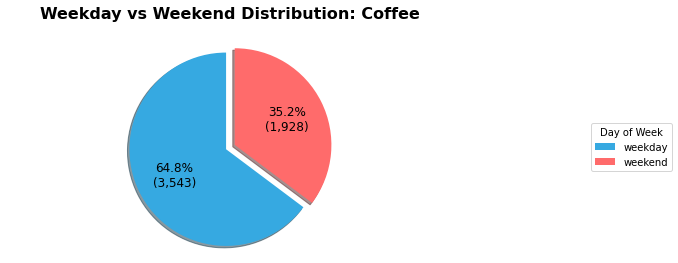

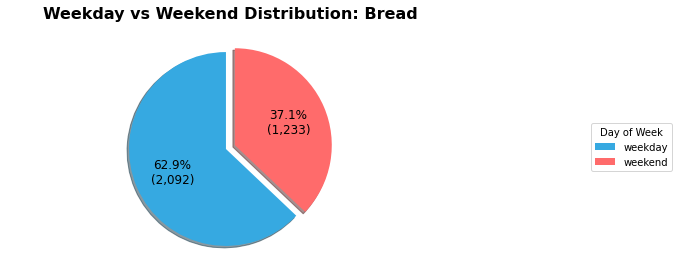

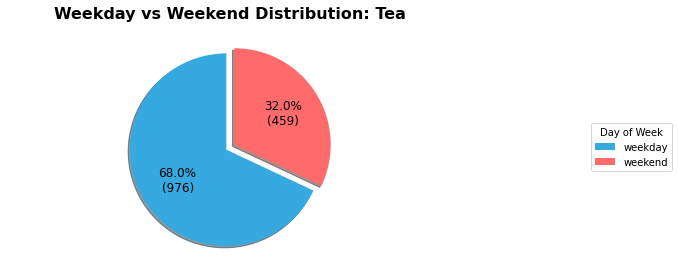

In [215]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:,})"

# Prepare data
size = df[df.Item.isin(popular.head(6).index)]
size = pd.crosstab(size['weekday_weekend'], size['Item'])
labels = size.index.values
colors = ['#36A9E1', '#FF6B6B']  

# Create pie charts for top 3 products
for item in popular.head(3).index:
    plt.figure(figsize=(8, 4))
    data = size[item]
    explode = [0, 0.1]
    
    plt.pie(data, 
            colors=colors, 
            explode=explode, 
            shadow=True,
            autopct=lambda pct: func(pct, data.values),
            textprops={'fontsize': 12},
            startangle=90)
    
    plt.title(f'Weekday vs Weekend Distribution: {item}', 
              pad=20, 
              fontsize=16, 
              fontweight='bold')
    
    plt.legend(labels=labels,
              title="Day of Week",
              loc="center right",
              bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.axis('equal')
    plt.show()

It is also interesting to study the activity of consumers during the day.


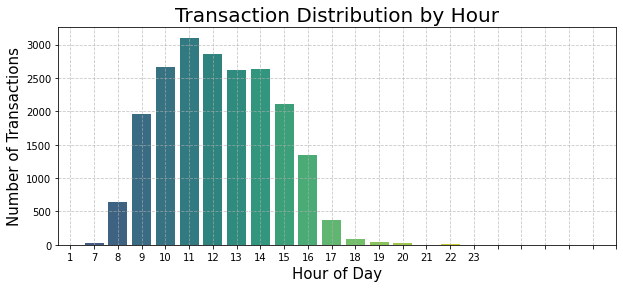

In [216]:
# Create hourly transaction summary
coutbyhour = df.groupby(df['date_time'].dt.hour).agg({
    'Transaction': 'count'
}).reset_index()
coutbyhour.columns = ['hour', 'Transaction']
coutbyhour.sort_values('hour', inplace=True)

# Create enhanced visualization
plt.figure(figsize=(10,4))
sns.barplot(
    data=coutbyhour, 
    x='hour', 
    y='Transaction',
    hue='hour',
    palette='viridis',
    dodge=False,
    legend=False
)

plt.xlabel('Hour of Day', size=15)
plt.ylabel('Number of Transactions', size=15)
plt.title('Transaction Distribution by Hour', size=20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(24))
plt.show()

It is clearly seen that consumers become the most active starting from 9 in the morning to 4 in the evening.


Let's analyze the activity of buyers during parts of the day. This information is the initial DataSet.


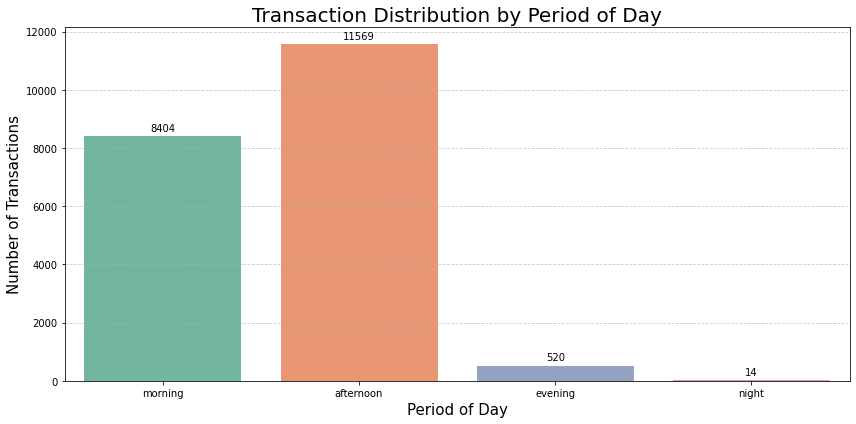

In [217]:
# Process data
coutbyweekday = df.groupby('period_day')['Transaction'].count().reset_index()
coutbyweekday.loc[:,"dayorder"] = [1, 2, 0, 3]  # Custom order
coutbyweekday.sort_values("dayorder", inplace=True)

# Create enhanced visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=coutbyweekday, 
    x='period_day', 
    y='Transaction',
    hue='period_day',
    palette='Set2',
    dodge=False,
    legend=False
)

# Add value labels on bars
for i in ax.containers:
    ax.bar_label(i, fmt='%d', padding=3)

# Customize appearance
plt.xlabel('Period of Day', size=15)
plt.ylabel('Number of Transactions', size=15)
plt.title('Transaction Distribution by Period of Day', size=20)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.tight_layout()

plt.show()

The graph confirms that buyers become most active during the afternoon.


## Association Rules


Defining the relationship between purchases is necessary to build association rules. To do this, it is necessary to transform the transaction DataSet into a special table. Columns of this table contain types of purchases and rows are transactions. Cells of this table should be bool (true/false). There are two most common ways to do this.


### Way 1. Pivot table


This way involves the use of classical pandas methods like pivot_table and group_by.

First of all, we group rows into transactions:


In [218]:
transactions = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


Then transform this DataSet by pivot_table into a necessary market basket structure:


In [219]:
basket = transactions.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
basket

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next, we should change non-zero data to True and zero data to False:


In [220]:
def encode_units(x):
    return x > 0

# Apply encoding using list comprehension and map
basket_sets = basket.apply(lambda x: x.map(encode_units))
basket_sets

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


This is a necessary market basket DataSet that contains information about 9465 clients and 94 types of purchases.


### Way 2. Using mlxtend framework


The classic machine learning library scikit-learn does not contain association rules functions. That's why we will use the **[mlxtend](http://rasbt.github.io/mlxtend/)** (machine learning extensions) framework. It is a Python library of useful ML tools.

First of all, we should create a list of transactions each of which is a lists of purchases.


In [221]:
transactions=[]
for item in df['Transaction'].unique():
    lst=list(set(df[df['Transaction']==item]['Item']))
    transactions.append(lst)

transactions[0:10]

[['Bread'],
 ['Scandinavian'],
 ['Jam', 'Cookies', 'Hot chocolate'],
 ['Muffin'],
 ['Pastry', 'Bread', 'Coffee'],
 ['Pastry', 'Medialuna', 'Muffin'],
 ['Pastry', 'Tea', 'Coffee', 'Medialuna'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna']]

Then we can easily get a market basket DataSet using **[TransactionEncoder()](http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/#transactionencoder)**.


In [222]:
te = TransactionEncoder()
encodedData = te.fit(transactions).transform(transactions)
basket_sets_2 = pd.DataFrame(encodedData, columns=te.columns_)
basket_sets_2

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


We got the same DataSet.

Now when the data is structured properly, we can generate frequent item sets for association rule mining that have an appropriate support (1% in our case) using **[apriori()](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)**.

Apriori is a popular algorithm  for extracting frequent itemsets with applications in association rule learning. The apriori algorithm has been designed to operate on databases containing transactions, such as purchases by customers of a store. An itemset is considered as "frequent" if it meets a user-specified support threshold. For instance, if the support threshold is set to 0.5 (50%), a frequent itemset is defined as a set of items that occur together in at least 50% of all transactions in the database.


In [223]:
frequentItems= apriori(basket_sets, use_colnames=True, min_support=0.01)
frequentItems.sort_values("support", ascending=False)

,support,itemsets
6,0.478394,(Coffee)
2,0.327205,(Bread)
26,0.142631,(Tea)
4,0.103856,(Cake)
34,0.090016,"(Bread, Coffee)"
...,...,...
11,0.010565,(Hearty & Seasonal)
20,0.010460,(Salad)
30,0.010354,"(Bread, Alfajores)"
58,0.010037,"(Bread, Coffee, Cake)"


This list is a necessary list for creating association rules using the function **[association_rules()](http://rasbt.github.io/mlxtend/api_modules/mlxtend.frequent_patterns/association_rules/#association_rules)** that generates a DataFrame of association rules including the metrics scores.


# Understanding Association Rules in Market Basket Analysis

## Data Overview
- Coffee (alone) appears in 48% of transactions
- Coffee with Bread appears in 9% of transactions
- Salad (alone) appears in 1% of transactions

## Association Rules Basics
An association rule shows relationships between items, expressed as X→Y, where:
- X and Y are distinct item sets
- Example: {Coffee}→{Bread} suggests Coffee buyers often buy Bread

## Key Metrics

### Support
- Measures frequency of itemsets in transactions
- Three types:
  - Antecedent support: P(A)
  - Consequent support: P(C) 
  - Combined support: P(A∪C)

### Confidence
- Measures P(C|A) - probability of C given A
- Asymmetric: conf(A→C) ≠ conf(C→A)
- Range: [0,1], where 1 indicates perfect association

### Lift
- Measures independence between A and C
- Lift = 1: Items are independent
- Lift > 1: Positive correlation
- Formula: P(A∪C)/(P(A)×P(C))

### Leverage
- Measures difference between observed and expected frequencies
- Leverage = 0 indicates independence
- Formula: P(A∪C) - P(A)×P(C)

### Conviction
- Measures dependence of consequent on antecedent
- Conviction = 1: Items are independent
- Conviction = ∞: Perfect confidence
- Formula: (1-P(C))/(1-confidence(A→C))

In [224]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2, num_itemsets=len(frequent_itemsets))
rules.sort_values('confidence', ascending=False, inplace=True)
print(rules)

         antecedents consequents  antecedent support  consequent support  \
24           (Toast)    (Coffee)            0.033597            0.478394   
22  (Spanish Brunch)    (Coffee)            0.018172            0.478394   
16       (Medialuna)    (Coffee)            0.061807            0.478394   
18          (Pastry)    (Coffee)            0.086107            0.478394   
1        (Alfajores)    (Coffee)            0.036344            0.478394   
15           (Juice)    (Coffee)            0.038563            0.478394   
19        (Sandwich)    (Coffee)            0.071844            0.478394   
11            (Cake)    (Coffee)            0.103856            0.478394   
20           (Scone)    (Coffee)            0.034548            0.478394   
13         (Cookies)    (Coffee)            0.054411            0.478394   
14   (Hot chocolate)    (Coffee)            0.058320            0.478394   
10         (Brownie)    (Coffee)            0.040042            0.478394   
17          

This data set contains all possible causal relationships.  

Let's see all rules that have lift>1:


In [225]:
rules[rules["lift"]>1].sort_values("support",ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
11,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,1.0,0.005044,1.102664,0.102840,0.103745,0.093105,0.320679
18,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,1.0,0.006351,1.164682,0.146161,0.091968,0.141396,0.325764
19,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,1.0,0.003877,1.115384,0.109205,0.074701,0.103448,0.306150
16,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,1.0,0.005614,1.210871,0.170091,0.069665,0.174148,0.321387
14,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,1.0,0.001683,1.058553,0.060403,0.058333,0.055314,0.284542
8,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,1.0,0.000985,1.017305,0.036980,0.075908,0.017011,0.213884
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,1.0,0.002179,1.083174,0.081700,0.055905,0.076787,0.288707
12,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,1.0,0.008959,1.111865,0.420538,0.106736,0.100611,0.197779
24,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,1.0,0.007593,1.764582,0.332006,0.048464,0.433293,0.376936
15,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,1.0,0.002154,1.119919,0.108738,0.041507,0.107078,0.288656


Imagine a situation where a customer buys a Cake. Let's predict what else they can buy:


In [226]:
rules[rules['antecedents'] == frozenset({'Cake'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
11,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,1.0,0.005044,1.102664,0.102840,0.103745,0.093105,0.320679
12,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,1.0,0.008959,1.111865,0.420538,0.106736,0.100611,0.197779
3,(Cake),(Bread),0.103856,0.327205,0.023349,0.224822,0.687097,1.0,-0.010633,0.867923,-0.336947,0.057269,-0.152177,0.148091


As you can see, there are three possible options:
1. Coffee - 47%
2. Tea - 14%
3. Bread - 3%


This can be a recommendation of which product should be placed closer to or farther from the cake on the shelves. Depending on the strategy of the supermarket.


Let's analyse which products are bought together the most frequently.


In [227]:
frequentItems["antecedent_len"] = frequentItems["itemsets"].apply(lambda x: len(x))
frequentItems[frequentItems["antecedent_len"]>1].sort_values(by=["antecedent_len","support"], ascending=False)

,support,itemsets,antecedent_len
59,0.011199,"(Pastry, Bread, Coffee)",3
58,0.010037,"(Bread, Coffee, Cake)",3
60,0.010037,"(Tea, Coffee, Cake)",3
34,0.090016,"(Bread, Coffee)",2
42,0.054728,"(Coffee, Cake)",2
55,0.049868,"(Tea, Coffee)",2
50,0.047544,"(Pastry, Coffee)",2
51,0.038246,"(Coffee, Sandwich)",2
48,0.035182,"(Coffee, Medialuna)",2
46,0.029583,"(Coffee, Hot chocolate)",2


The confidence for a very frequent consequent is always high even if there is a very weak association. So, this doesn't give us a clearer picture. Here, coffee is by far the most frequent item and the best seller. It can therefore be recommended anyway with every other item. So, we can drop the rules recommending coffee to get a clearer picture of the real unknown rules generated from the data.


In [230]:
# Create boolean mask for rules with Coffee in consequent
index_names = rules['consequents'].apply(lambda x: 'Coffee' in x)

# Filter rules, remove Coffee recommendations
refinedRules = rules[~index_names].sort_values('lift', ascending=False)

# Drop less relevant metrics and reset index
refinedRules.drop(['leverage','conviction'], axis=1, inplace=True)
refinedRules = refinedRules.reset_index(drop=True)

# Display results
print("Top association rules (excluding Coffee recommendations):")
refinedRules.head()

Top association rules (excluding Coffee recommendations):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,zhangs_metric,jaccard,certainty,kulczynski
0,"(Tea, Coffee)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,1.0,0.509401,0.069853,0.108705,0.148957
1,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,1.0,0.420538,0.106736,0.100611,0.197779
2,(Sandwich),(Tea),0.071844,0.142631,0.014369,0.200000,1.402222,1.0,0.309050,0.071806,0.066913,0.150370
3,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,1.0,0.036980,0.075908,0.017011,0.213884
4,(Alfajores),(Bread),0.036344,0.327205,0.010354,0.284884,0.870657,1.0,-0.133570,0.029315,-0.062904,0.158264


Now the relationship between other types of goods is visible more clearly, such as Cake -> Tea or (Tea and Coffee) -> Cake


## Visualization of Association Rules


An important issue of analysis and understanding of associative rules is the possibility of their visualization. There are several approaches to this. However, the most clear and obvious is the use of the library **[pyvis](https://pyvis.readthedocs.io/en/latest/)**. This is a special framework for Interactive network visualizations.


First of all, we should create a pyvis **[Network()](https://pyvis.readthedocs.io/en/latest/documentation.html?highlight=Network#pyvis.network.Network)**. The Network class is the focus of this library. All pyvis functionality should be implemented off of a Network instance.


In [232]:
Basket_Network = Network(
    height="1000px", 
    width="1000px", 
    directed=True, 
    notebook=True,
    cdn_resources='remote'  # Fix browser compatibility warning
)

Then we should choose the type of pyvis network. There are several types such as: **[force_atlas_2based()](https://pyvis.readthedocs.io/en/latest/documentation.html?highlight=repulsion#pyvis.network.Network.repulsion)**, **[barnes_hut()](https://pyvis.readthedocs.io/en/latest/documentation.html?highlight=repulsion#pyvis.network.Network.repulsion)**, **[hrepulsion()](https://pyvis.readthedocs.io/en/latest/documentation.html?highlight=repulsion#pyvis.network.Network.repulsion)**, **[repulsion()](https://pyvis.readthedocs.io/en/latest/documentation.html?highlight=repulsion#pyvis.network.Network.repulsion)**, **[etc](https://pyvis.readthedocs.io/en/latest/documentation.html?highlight=repulsion#pyvis.network.Network.repulsion)**.


In [233]:
# Basket_Network.force_atlas_2based()
# Basket_Network.barnes_hut()
# Basket_Network.hrepulsion()
Basket_Network.repulsion()

Then we should create nodes (**[add_node()](https://pyvis.readthedocs.io/en/latest/documentation.html?highlight=add_node#pyvis.network.Network.add_node)**) and eges (**[add_edge()](https://pyvis.readthedocs.io/en/latest/documentation.html?highlight=add_edge#pyvis.network.Network.add_edge)**) between them for a pyvis graph based on rules:


In [234]:
Basket_Network_Data_zip=zip(rules["antecedents"],
                            rules["consequents"],
                            rules["antecedent support"],
                            rules["consequent support"],
                            rules["confidence"])

for i in Basket_Network_Data_zip:
    FromItem=str(i[0]).replace("frozenset({'","").replace("'})","").replace("',　'",",")
    ToItem=str(i[1]).replace("frozenset({'","").replace("'})","").replace("',　'",",")
    FromWeight=i[2]
    ToWeight=i[3]
    EdgeWeight=i[4]

    Basket_Network.add_node(n_id=FromItem, shape="dot", value=FromWeight,
                            title=FromItem + "<br>Support: " + str(FromWeight))
    Basket_Network.add_node(n_id=ToItem, shape="dot", value=ToWeight,
                           title=ToItem + "<br>Support: " + str(ToWeight))
    Basket_Network.add_edge(source=FromItem, to=ToItem, value=EdgeWeight, arrowStrikethrough=False,
                            title=FromItem + " --> " + ToItem + "<br>Confidence:" + str(EdgeWeight))

Then we should set the edges smooth (**[set_edge_smooth](https://pyvis.readthedocs.io/en/latest/documentation.html?highlight=set_edge_smooth#pyvis.network.Network.set_edge_smooth)**) and set the parameters of visualizations like **[toggle_hide_edges_on_drag](https://pyvis.readthedocs.io/en/latest/documentation.html?highlight=toggle_hide_edges_on_drag#pyvis.network.Network.toggle_hide_edges_on_drag)**.


In [235]:
Basket_Network.set_edge_smooth(smooth_type="continuous")
Basket_Network.toggle_hide_edges_on_drag(True)

The last step - we save the graph into a file and visualize it using **[save_graph()](https://pyvis.readthedocs.io/en/latest/documentation.html?highlight=save_graph#pyvis.network.Network.save_graph)** and **[show()](https://pyvis.readthedocs.io/en/latest/documentation.html?highlight=show#pyvis.network.Network.show)**.


In [236]:
Basket_Network.save_graph("Basket_Network1.html")
Basket_Network.show("Basket_Network1.html")

Basket_Network1.html


As we can see, the graph allows us to easily understand all races together. The width of lines show us the confidence of rule, the size of node indicate support.


Let's do the same for refinedRules:


In [237]:
# Initialize network with remote CDN
Basket_Network2 = Network(
    height="1000px", 
    width="1000px", 
    directed=True, 
    notebook=True,
    cdn_resources='remote'
)
Basket_Network2.repulsion()

# Create network data
Basket_Network_Data2_zip = zip(
    refinedRules["antecedents"],
    refinedRules["consequents"],
    refinedRules["antecedent support"],
    refinedRules["consequent support"],
    refinedRules["confidence"]
)

# Build network
for antecedent, consequent, ant_support, cons_support, confidence in Basket_Network_Data2_zip:
    # Clean node labels
    FromItem = str(antecedent).replace("frozenset({'","").replace("'})","").replace("',　'",",")
    ToItem = str(consequent).replace("frozenset({'","").replace("'})","").replace("',　'",",")
    
    # Add nodes and edges
    Basket_Network2.add_node(
        n_id=FromItem, 
        shape="dot", 
        value=ant_support,
        title=f"{FromItem}<br>Support: {ant_support:.3f}"
    )
    Basket_Network2.add_node(
        n_id=ToItem, 
        shape="dot", 
        value=cons_support,
        title=f"{ToItem}<br>Support: {cons_support:.3f}"
    )
    Basket_Network2.add_edge(
        source=FromItem, 
        to=ToItem, 
        value=confidence, 
        arrowStrikethrough=False,
        title=f"{FromItem} --> {ToItem}<br>Confidence: {confidence:.3f}"
    )

# Configure display
Basket_Network2.set_edge_smooth('continuous')
Basket_Network2.toggle_hide_edges_on_drag(True)
Basket_Network2.show("Basket_Network2.html")

Basket_Network2.html


## Conclusions


In this project, we performed a market basket analysis based on the Bread Basket dataset from a bakery in Edinburgh, using both classical data visualization techniques and the Apriori algorithm, standard indicators, association rules, aggregation and trimming rules. We visualized association rules in the form of a dynamic graph.

Based on real data, we comprehensively analyzed the dynamics of purchases and most popular purchases with their support. We created and analyzed association rules. Based on them, we found the most popular products bought together. We learned to predict which products will be bought and to create recommendations for the location of products on supermarket shelves.
